# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd
from scipy import linalg

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u, s, vh = svd(A)
    m,n = A.shape
    a=min(m,n)
    sum=np.zeros((m,n))
    for j in range(0,a):
        sum= s[j]*np.outer(u[:,j],vh[j,:])+sum
    return np.allclose(A,sum) 

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

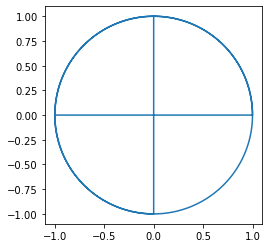

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)
show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)
print(A.shape)

[[0.1 0.5]
 [0.4 0.8]]
(2, 2)


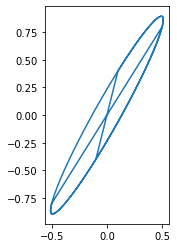

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)
#print(s)

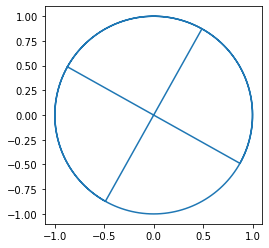

In [11]:
show_circle(u @ circle)

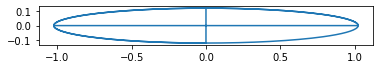

In [12]:
# necesitamos un operador asique consideramo la matrix diagonal dada por la serie de valores singulares
show_circle(np.diag(s) @ circle)

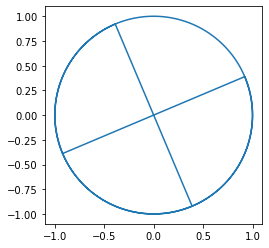

In [13]:
show_circle(vh @ circle)

__Respuesta:__ Como se dijo, al final podemos resumir en que estamos haciendo un cambio de base de $R^2$: U y V hacen rotaciones y Sigma escala las componentes. Es relevante que sean unitarios porque tendremos una isometría entre los espacios donde opera $A$, es decir, mantenemos las distancias (todo en $R^2$ asique la norma convencional). De ahi que con U y V los vemos de la misma forma pero rotados.

__Respuesta:__ son la composicion de A a traves de operadores que caracterizan a A
$$A (\bullet)= U(\Sigma(V^H(\bullet)))$$

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

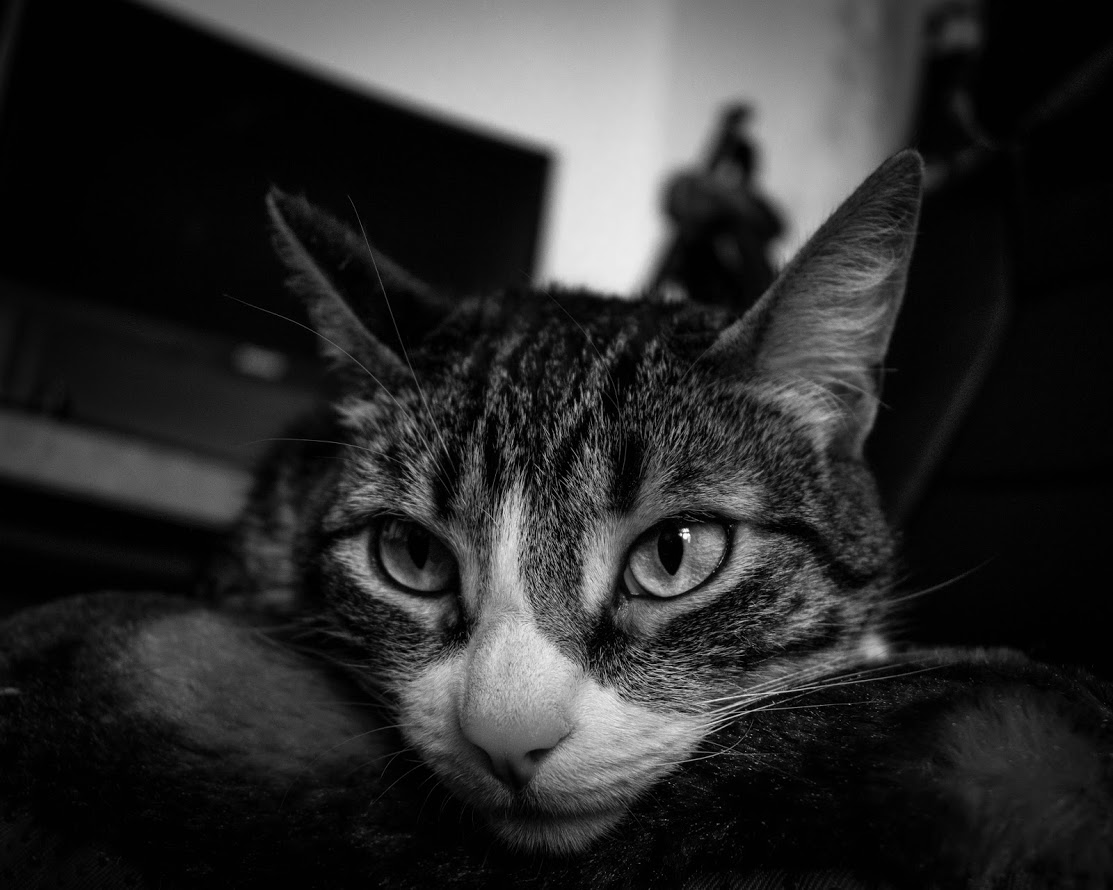

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    m,n = A.shape
    a=min(m,n)
    sum=np.zeros((m,n))
    for j in range(0,l):
        sum= s[j]*np.outer(u[:,j],vh[j,:])+sum
    error=linalg.norm(A-sum,'fro')
    return sum

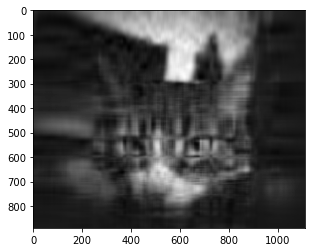

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

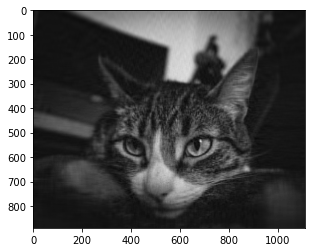

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [20]:
def func_tol(s,l):
    #m,=s.shape
    total=np.inner(s,s)
    partial=total-np.inner(s[0:l],s[0:l])
    return (partial/total)**(1/2)

In [21]:
def low_rank_svd_tol_approximation(A, tol):
    m,n=A.shape
    u,s,vh=svd(A)
    a=min(m,n)
    
    for l in range(0,a):
        tol_e= func_tol(s,l)
        if tol_e <= tol:
            approx_l=low_rank_svd_approximation(A, l)
            print("mayor rango aproximado de  𝐴  tal que el error de aproximación sea a lo más  𝜀 es",l)
            return approx_l
            break
    print("no existe l para el cual se cumpla la cota")

mayor rango aproximado de  𝐴  tal que el error de aproximación sea a lo más  𝜀 es 64


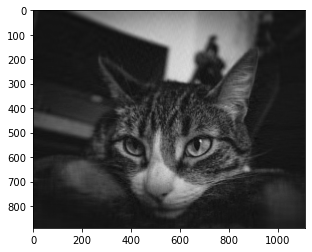

In [22]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

mayor rango aproximado de  𝐴  tal que el error de aproximación sea a lo más  𝜀 es 455


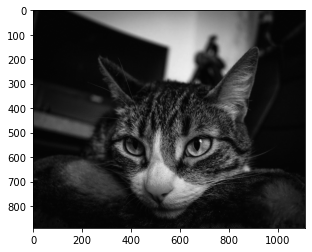

In [23]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

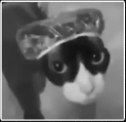

In [24]:
#your_img_name = # FIX ME PLEASE #
your_img = Image.open(Path().resolve().parent / "images" / "gatito.png" ).convert('L')
your_img

In [25]:
your_img_np = np.array(your_img)

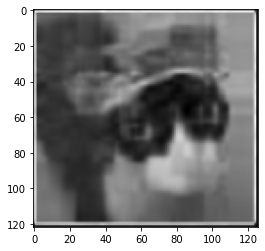

In [26]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

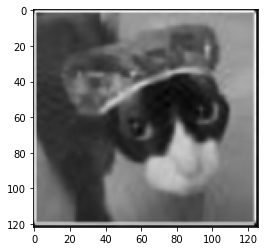

In [27]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

mayor rango aproximado de  𝐴  tal que el error de aproximación sea a lo más  𝜀 es 8


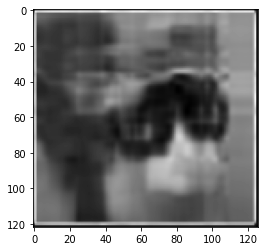

In [28]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

mayor rango aproximado de  𝐴  tal que el error de aproximación sea a lo más  𝜀 es 36


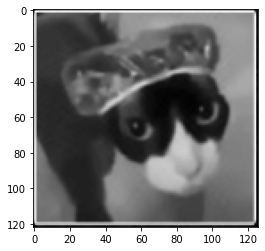

In [29]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ lo de útil es claro dado que soluciona un problema, un tema a discusion es si es eficiente el algoritmo. Por ejemplo, lo que propuse se compone de 

$\bullet$ __(1) low_rank_svd_approximation(A, l):__ que tiene un costo de _producto vectorial_ $\times$ rang(A)(ciclo for). Sabemos que el producto externo entre vectores no es tan costoso.

$\bullet$ __(2)low_rank_svd_tol_approximation(A, tol):__ que usa la anterior a lo más una vez y el for donde está, en caso de no usarla, las operaciones que tiene que hacer no son costosas, tales como operar vectores con funciones de numpy, sumar, etc (que son cosas ya optimizadas).

En concreto, como solo tenemos operaciones elementales (solo linealidad, ie, no componemos estas) para las bibliotecas usadas, el algoritmo no tendrá un comportamiento explosivo a medida que aumentamos el grosor de los datos, aunque esto se deberá determinar con una cota más precisa que algo cualitativo como digo. Ahora, podriamos hacer más eficiente el _for_ de la función (1), incluso quiza nisiquiera usar un for y usar algo ya optimizado en las bibliotecas. Por esto mismo, como veo fallos en mi algoritmo puedo suponer que efectivamente alguien ya solucionó esto para otra escala. 

comentario adicional: también considerar que uso svd dos veces y podría acotarlo a 1

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [30]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [31]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
fechas= list(covid_comunas.columns) 
for j in ['region','codigo_region','comuna','codigo_comuna','poblacion','tasa']:
    fechas.remove(j)
l=1

covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [32]:
covid_comunas= covid_comunas.dropna(axis=0, subset=['codigo_comuna']).fillna(0)
covid_comunas_copia= covid_comunas.melt(
    id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa']
    ,value_vars=fechas
    ,var_name='fecha'
    , value_name='casos totales')
covid_comunas_copia=covid_comunas_copia.assign(
    casos_nuevos=lambda df: df.groupby("comuna")["casos totales"].transform(lambda s: s-s.shift())
).fillna(0)

if l==1:
    fechas.remove('2020-10-02') #podria ser un for pero son 3 elementos asique no vale la pena
    fechas.remove('2020-10-05')
    fechas.remove('2020-10-09')
l=0
    
for j in fechas:
    covid_comunas_copia=covid_comunas_copia[~covid_comunas_copia.fecha.str.contains(j)]

covid_comunas_copia.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,tasa,fecha,casos totales,casos_nuevos
19030,Arica y Parinacota,15,Arica,15101.0,247552.0,3994.3,2020-10-02,8597.0,265.0
19031,Arica y Parinacota,15,Camarones,15102.0,1233.0,2270.9,2020-10-02,27.0,0.0
19032,Arica y Parinacota,15,General Lagos,15202.0,810.0,7901.2,2020-10-02,64.0,0.0
19033,Arica y Parinacota,15,Putre,15201.0,2515.0,2862.8,2020-10-02,67.0,0.0
19034,Tarapacá,1,Alto Hospicio,1107.0,129999.0,3225.4,2020-10-02,3824.0,71.0


In [33]:
covid_comunas2=covid_comunas_copia.groupby(['region','comuna'], as_index=False).agg(promedio_casos_nuevos=("casos_nuevos", "mean"))
covid_comunas2.head()

,region,comuna,promedio_casos_nuevos
0,Antofagasta,Antofagasta,132.000000
1,Antofagasta,Calama,38.000000
2,Antofagasta,Maria Elena,0.000000
3,Antofagasta,Mejillones,4.666667
4,Antofagasta,Ollague,0.000000


In [34]:
covid_comunas2=covid_comunas2.merge(covid_comunas, how="left", on=("region","comuna")).loc[:, ["region", "comuna", "poblacion","promedio_casos_nuevos"]].drop_duplicates(subset=['region', 'comuna'], keep="first")
covid_comunas2.head()

,region,comuna,poblacion,promedio_casos_nuevos
0,Antofagasta,Antofagasta,425725.0,132.000000
1,Antofagasta,Calama,190336.0,38.000000
2,Antofagasta,Maria Elena,6814.0,0.000000
3,Antofagasta,Mejillones,14776.0,4.666667
4,Antofagasta,Ollague,287.0,0.000000


In [35]:
covid_comunas2=covid_comunas2.assign(
    tasa_promedio_casos_nuevos=covid_comunas2.loc(1)["promedio_casos_nuevos"]*(100000/covid_comunas2.loc(1)["poblacion"])
    ).sort_values('tasa_promedio_casos_nuevos')
covid_comunas2.tail(10)

,region,comuna,poblacion,promedio_casos_nuevos,tasa_promedio_casos_nuevos
16,Araucanía,Ercilla,8458.0,15.333333,181.287933
10,Araucanía,Carahue,25486.0,46.666667,183.107065
139,Los Lagos,Rio Negro,14275.0,32.333333,226.503211
140,Los Lagos,San Juan de la Costa,7639.0,20.333333,266.177947
157,Magallanes,Natales,23782.0,96.666667,406.469879
160,Magallanes,Punta Arenas,141984.0,631.333333,444.651040
158,Magallanes,Porvenir,7323.0,34.333333,468.842460
156,Magallanes,Laguna Blanca,264.0,1.333333,505.050505
162,Magallanes,San Gregorio,681.0,4.000000,587.371512
163,Magallanes,Timaukel,282.0,3.333333,1182.033097


In [36]:
covid_comunas2["tasa_promedio_casos_nuevos"].mean()

45.80649410957302

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Que la region de Magallanes tiene la comunas más criticas, alcanza aproximadamente el doble de los de la penultima region.

### Ejercicio 7
(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [37]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
).fillna(0)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Arica y Parinacota,15,252110,70.0,0.0,93.0,103.0,0.0,93.0,24.0,...,794,738,737,832,542,343,706,777,1058,1025
1,Tarapacá,1,382773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,972,932,1046,1044,796,714,694,946,1752,906
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1571,1890,2239,3825,1749,1354,1858,1238,1906,2549
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,792,838,1020,939,563,340,237,838,863,781
4,Coquimbo,4,836096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1008,1128,1057,1026,473,1503,1050,1125,1351,1245


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

#### DESARROLLO Ejercicio 7

In [38]:
fechas_pcr= list(covid_pcr.columns) 
for j in ['region','codigo_region','poblacion']:
    fechas_pcr.remove(j)

covid_pcr_melt =covid_pcr.melt(
    id_vars=['region','poblacion']
    ,value_vars=fechas_pcr
    ,var_name='fecha'
    , value_name='nm_pcr')
covid_pcr_melt['fecha'] = pd.to_datetime(covid_pcr_melt['fecha'])
#l=0
    
#for j in fechas:#    covid_comunas=covid_comunas[~covid_comunas.fecha.str.contains(j)]
covid_pcr_melt.head()

,region,poblacion,fecha,nm_pcr
0,Arica y Parinacota,252110,2020-04-09,70.0
1,Tarapacá,382773,2020-04-09,0.0
2,Antofagasta,691854,2020-04-09,182.0
3,Atacama,314709,2020-04-09,57.0
4,Coquimbo,836096,2020-04-09,0.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [39]:
fechas= list(covid_comunas.columns) 
for j in ['region','codigo_region','comuna','codigo_comuna','poblacion','tasa']:
    fechas.remove(j)

covid_comunas_copia2= covid_comunas.melt(
    id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa']
    ,value_vars=fechas
    ,var_name='fecha'
    , value_name='casos totales')
covid_comunas_copia2=covid_comunas_copia2.assign(
    casos_nuevos=lambda df: df.groupby("comuna")["casos totales"].transform(lambda s: s-s.shift())
).fillna(0)

covid_casos_melt=covid_comunas_copia2.groupby(['region','fecha'], as_index=False).agg(casos_totales2=("casos totales", "sum"))
#covid_casos_melt=covid_casos_melt.merge(covid_comunas_copia2, how="left", on=("region",'fecha')).loc[:, ["region", "fecha","casos_totales2"]]
covid_casos_melt['fecha'] = pd.to_datetime(covid_casos_melt['fecha'])
covid_casos_melt.head()

,region,fecha,casos_totales2
0,Antofagasta,2020-03-30,29.0
1,Antofagasta,2020-04-01,32.0
2,Antofagasta,2020-04-03,49.0
3,Antofagasta,2020-04-06,65.0
4,Antofagasta,2020-04-08,72.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [40]:
covid_corr_casos_pcr = covid_casos_melt.merge(covid_pcr_melt, how="left", on=("region",'fecha'))
covid_corr_casos_pcr['nm_pcr']=covid_corr_casos_pcr['nm_pcr'].fillna(0)
#covid_corr_casos_pcr['casos_totales2']=covid_corr_casos_pcr['casos_totales2'].ffill()
#.loc[:, ["region", "fecha","casos_totales2"]]
covid_corr_casos_pcr=covid_corr_casos_pcr.ffill(axis=1)
#covid_corr_casos_pcr=covid_corr_casos_pcr.groupby('region')
covid_corr_casos_pcr

,region,fecha,casos_totales2,poblacion,nm_pcr
0,Antofagasta,2020-03-30,29,29,0
1,Antofagasta,2020-04-01,32,32,0
2,Antofagasta,2020-04-03,49,49,0
3,Antofagasta,2020-04-06,65,65,0
4,Antofagasta,2020-04-08,72,72,0
...,...,...,...,...,...
1019,Ñuble,2020-10-16,9127,511551,706
1020,Ñuble,2020-10-19,9268,511551,1029
1021,Ñuble,2020-10-24,9532,511551,1032
1022,Ñuble,2020-10-26,9632,511551,971


In [41]:
covid_corr_casos_pcr = covid_casos_melt.merge(covid_pcr_melt, how="left", on=("region",'fecha'))

covid_corr_casos_pcr['nm_pcr']=covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr['casos_totales2'].ffill(inplace=True)

covid_corr_casos_pcr=covid_corr_casos_pcr.loc[:, ["region","casos_totales2","nm_pcr"]].groupby('region').corr().reset_index()
covid_corr_casos_pcr=covid_corr_casos_pcr.iloc[::2].loc[:, ["region","nm_pcr"]].sort_values('nm_pcr',ascending=True)
covid_corr_casos_pcr.T

,22,18,0,8,6,14,30,10,28,2,16,4,12,26,24,20
region,Metropolitana,Magallanes,Antofagasta,Aysén,Atacama,Los Lagos,Ñuble,Biobío,Valparaíso,Araucanía,Los Ríos,Arica y Parinacota,Coquimbo,Tarapacá,O’Higgins,Maule
nm_pcr,0.685155,0.777209,0.781404,0.810576,0.830556,0.857243,0.857392,0.899447,0.900126,0.906849,0.91784,0.918198,0.922259,0.923568,0.929886,0.946419


__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Que en la zona mas afectada (Magallanes) no notamos que haya relacion entre cantidad de pcr tomados y la cantidad de casos, que es donde más deberiamos notar lo contrario.

#### Ejercicio 8 


(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

¿en la cantidad de casos podemos encontrar diferencias entre generos?¿qué nivel de asimetria por fecha notamos?

In [42]:
#para esto consideraremos dos datas
casos_etareo= (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
).fillna(0)
casos_etareo.head()

,grupo_de_edad,sexo,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,...,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30
0,00 - 04 años,M,4,5,5,5,5,5,6,7,...,5403,5552,5552,5733,5823,5913,6003,6143,6196,6290
1,05 - 09 años,M,2,2,2,4,4,4,4,7,...,4644,4762,4762,4996,5075,5175,5258,5384,5429,5535
2,10 - 14 años,M,7,8,8,10,10,10,10,12,...,5298,5451,5451,5674,5776,5880,5987,6142,6197,6300
3,15 - 19 años,M,8,9,13,16,17,18,22,26,...,8535,8727,8727,9161,9319,9486,9619,9842,9942,10076
4,20 - 24 años,M,25,32,35,46,52,58,64,72,...,20310,20648,20648,21188,21440,21703,21929,22273,22430,22706


In [43]:
fechas_etareo= list(casos_etareo.columns) 
for j in ['grupo_de_edad','sexo']:
    fechas_etareo.remove(j)

casos_etareo_copia= casos_etareo.melt(
    id_vars=['grupo_de_edad','sexo']
    ,value_vars=fechas_etareo
    ,var_name='fecha'
    , value_name='casos_totales').assign(
        variacion=lambda df: df.groupby(["sexo","grupo_de_edad"])["casos_totales"].transform(lambda s: s-s.shift())
    ).fillna(0)
casos_etareo_copia=casos_etareo_copia.groupby(['sexo','grupo_de_edad']).agg({"variacion": "mean"}).reset_index()
casos_F = casos_etareo_copia[casos_etareo_copia['sexo']=='F']
casos_M = casos_etareo_copia[casos_etareo_copia['sexo']=='M']

casos_etareo_copia = casos_M.merge(casos_F , how="left", on="grupo_de_edad")

casos_etareo_copia=casos_etareo_copia.assign(
    diferencia_porc = 100*abs(casos_etareo_copia.loc(1)["variacion_x"] - casos_etareo_copia.loc(1)["variacion_y"])/np.sqrt(casos_etareo_copia.loc(1)["variacion_x"]*casos_etareo_copia.loc(1)["variacion_y"])
    )
casos_etareo_copia.head()


,sexo_x,grupo_de_edad,variacion_x,sexo_y,variacion_y,diferencia_porc
0,M,00 - 04 años,71.431818,F,65.443182,8.758906
1,M,05 - 09 años,62.875000,F,59.920455,4.813535
2,M,10 - 14 años,71.511364,F,74.636364,4.277473
3,M,15 - 19 años,114.409091,F,128.306818,11.470666
4,M,20 - 24 años,257.738636,F,265.602273,3.005507


In [44]:
# entonces el promedio de las diferencias porcentuales
casos_etareo_copia["diferencia_porc"].mean()

8.772439511457723

respecto a el otro conjunto de datos

In [45]:
etareo_hosp = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto22/HospitalizadosEtario_Acumulado.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
).fillna(0)

#el dataframe está seccionado por 4 bloques con 2 no nulos que son

df_et1=etareo_hosp.head(12) #que tiene datos hasta 	2020-04-20
df_et2=etareo_hosp.tail(14) # parten sus datos desde 2020-04-22

i=1

# el original es de la forma

etareo_hosp.head()

,grupo_de_edad,sexo,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,...,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30
0,00 15 años,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15 29 años,M,2.0,6.0,8.0,8.0,9.0,9.0,11.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30 44 años,M,9.0,26.0,28.0,34.0,42.0,43.0,46.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45 59 años,M,8.0,17.0,20.0,23.0,32.0,35.0,39.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60 79 años,M,11.0,22.0,25.0,28.0,32.0,35.0,36.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# eliminamos las columnas posteriores a 2020-04-20 de df_et1 y lo anterior para df_et2

df_et1=df_et1[df_et1.columns[range(30)]]
df_et2=pd.concat([df_et2.iloc[:,0:2],df_et2.iloc[:,30:]],axis = 1)

# comencemos operando df_et1
#hacemos lo mismo que en el ejercicio 6, donde para cada fecha calculamos el aumento de casos

fechas= list(df_et1.columns) 

for j in ['grupo_de_edad','sexo']:
    fechas.remove(j)

df_et1= df_et1.melt(
    id_vars=['grupo_de_edad','sexo']
    ,value_vars=fechas
    ,var_name='fecha'
    , value_name='casos')
df_et1=df_et1.assign(
    casos_nuevos=lambda df: df.groupby(["sexo","grupo_de_edad"])["casos"].transform(lambda s: s-s.shift())
).fillna(0)

df_et1=pd.merge(
    df_et1[df_et1["sexo"]=='M'],df_et1[df_et1["sexo"]=='F'], on=["fecha","grupo_de_edad"]
        )
# df_et1=pd.concat([df_et2.iloc[:,0:2],df_et2.iloc[:,30:]],axis = 1)

#hacemos lo mismo para df_et2

fechas= list(df_et2.columns) 

for j in ['grupo_de_edad','sexo']:
    fechas.remove(j)

df_et2= df_et2.melt(
    id_vars=['grupo_de_edad','sexo']
    ,value_vars=fechas
    ,var_name='fecha'
    , value_name='casos')
df_et2=df_et2.assign(
    casos_nuevos=lambda df: df.groupby(["sexo","grupo_de_edad"])["casos"].transform(lambda s: s-s.shift())
).fillna(0)

df_et2=pd.merge(
    df_et2[df_et2["sexo"]=='M'],df_et2[df_et2["sexo"]=='F'], on=["fecha","grupo_de_edad"]
        )

    # from IPython.display import display_html 
    # df1_styler = df_et1.head().style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
    # df2_styler = df_et2.head().style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
    # display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

#por ejemplo, df_et1 es de la forma

df_et1.head()

,grupo_de_edad,sexo_x,fecha,casos_x,casos_nuevos_x,sexo_y,casos_y,casos_nuevos_y
0,00 15 años,M,2020-03-24,1.0,0.0,F,1.0,0.0
1,15 29 años,M,2020-03-24,2.0,0.0,F,9.0,0.0
2,30 44 años,M,2020-03-24,9.0,0.0,F,7.0,0.0
3,45 59 años,M,2020-03-24,8.0,0.0,F,6.0,0.0
4,60 79 años,M,2020-03-24,11.0,0.0,F,5.0,0.0


In [47]:
# tomaremos como estadistica 
# x=casos_nuevos_hombres
# y=casos_nuevoabss_mujeres
# diferencia_por = |x-y|/(x+y)
# Notemos que calcular errores, por ejemplo |x-y|/x, no resultaría bien ya qye tenemos datos de la forma (x,y)=(3,0), con lo que posteriormente calcular
# medias no tendria sentido. Es por esto que se prefiere calcular cuan asimétrico es por día respecto a los casos diarios

df_et1=df_et1.assign(
     diferencia_porc=lambda df: 100*abs(df["casos_nuevos_x"]-df["casos_nuevos_y"])/(df["casos_nuevos_x"]+df["casos_nuevos_y"])
).fillna(0)

df_et2=df_et2[df_et2["casos_nuevos_x"]>=0]

df_et2=df_et2.assign(
     diferencia_porc=lambda df: 100*abs(df["casos_nuevos_x"]-df["casos_nuevos_y"])/(df["casos_nuevos_x"]+df["casos_nuevos_y"])
).fillna(0)

df_et2.head()

,grupo_de_edad,sexo_x,fecha,casos_x,casos_nuevos_x,sexo_y,casos_y,casos_nuevos_y,diferencia_porc
0,00 5 años,M,2020-04-22,11.0,0.0,F,8.0,0.0,0.0
1,5 17 años,M,2020-04-22,15.0,0.0,F,14.0,0.0,0.0
2,18 49 años,M,2020-04-22,381.0,0.0,F,307.0,0.0,0.0
3,50 59 años,M,2020-04-22,199.0,0.0,F,164.0,0.0,0.0
4,60 69 años,M,2020-04-22,174.0,0.0,F,123.0,0.0,0.0


In [48]:
#calculamos la media geometrica de las medias de asimetria de cada tabla. Esto para 
np.sqrt(df_et2["diferencia_porc"].mean()*df_et2["diferencia_porc"].mean())

20.97032171764556

__Respuesta:__ En concreto, en al cantidad de infectados o notamos mucha diferencia ($\sim$8%) y hospitalizados notemos una tendencia a unos datos más asimétricos ($\sim$20%)

#### Ejercicio 9

(10 puntos)

__Pregunta:__ __¿los indicadores 'promedio' se amortiguan después de realizar una cuarentena?__.

__Respuesta:__ evaluaremos esto con los siguientes set de datos 

(1) [DP29 - Cuarentenas Activas e Históricas](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto29), especificamente [Cuarentenas-Totales.csv](https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv) que es la mas actualizada ($\sim$ 1 semana)

(2) el mismo dataframe usado en el ejercicio 7 https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv

In [49]:
#como en (1) solo disponemos de comunas que estuvieron en cuerentena eliminamos las columnas que no nos interesan

covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
fechas= list(covid_comunas.columns) 
for j in ['region','codigo_region','codigo_comuna','tasa']:
    fechas.remove(j)

covid_comunas=covid_comunas.loc[:, fechas].dropna(axis=0, subset=['poblacion']).fillna(0)

#hacemos lo mismo que en el ejercicio 6, donde para cada fecha calculamos el aumento de casos

fechas= list(covid_comunas.columns) 
for j in ['comuna',	'poblacion']:
    fechas.remove(j)

covid_comunas_copia= covid_comunas.melt(
    id_vars=['comuna','poblacion']
    ,value_vars=fechas
    ,var_name='fecha'
    , value_name='casos totales')
covid_comunas_copia=covid_comunas_copia.assign(
    casos_nuevos=lambda df: df.groupby("comuna")["casos totales"].transform(lambda s: s-s.shift())
).fillna(0)

comunas_1=covid_comunas_copia['comuna']

covid_comunas_copia.tail()

,comuna,poblacion,fecha,casos totales,casos_nuevos
22139,Punta Arenas,141984.0,2020-10-30,10996.0,170.0
22140,Rio Verde,211.0,2020-10-30,2.0,0.0
22141,San Gregorio,681.0,2020-10-30,20.0,1.0
22142,Timaukel,282.0,2020-10-30,21.0,2.0
22143,Torres del Paine,1021.0,2020-10-30,2.0,0.0


In [50]:
#por su parte también eliminamos las columnas no deseadas del dataframe de historial de cuarentenas

cuarentenas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
fechas= list(cuarentenas.columns) 
for j in ['id','alcance','código_cut_comuna','detalle','superficie_en_m2','perímetro_en_m','region','n_region']:
    fechas.remove(j)

#cambiamos las fechas desde el formato año-mes-dia hora  a solo año-mes-dia como es en el otro dataframe
    
cuarentenas=cuarentenas.loc[:, fechas]
cuarentenas['fecha_de_término']=cuarentenas['fecha_de_término'].str.split(n=4).str[-2]
cuarentenas['fecha_de_inicio']=cuarentenas['fecha_de_inicio'].str.split(n=4).str[-2]

#cambiamos nombre a comuna

cuarentenas=cuarentenas.rename(columns = {'nombre':'comuna'})

#guardamos las comunas que tuvieron cuarentenas

comunas_2=cuarentenas['comuna']
                               
cuarentenas.head()

,comuna,estado,fecha_de_inicio,fecha_de_término
0,Arica,Histórica,2020-04-16,2020-05-15
1,Santiago Norte,Histórica,2020-04-13,2020-05-05
2,Puente Alto Poniente,Histórica,2020-04-09,2020-05-08
3,El Bosque,Histórica,2020-04-16,2020-09-21
4,San Bernardo Nororiente,Histórica,2020-04-16,2020-05-08


In [51]:
#eliminamos las comunas que no tuvieron cuarentena de los dos dataframe con un merge

df_curentenas = cuarentenas.merge(covid_comunas_copia, how="left", on=("comuna"))
df=df_curentenas

#cambiamos los datos a tipo datetime para operarlos posteriormente

df['fecha']=pd.to_datetime(df['fecha'])
df['fecha_de_inicio']=pd.to_datetime(df['fecha_de_inicio'])
df['fecha_de_término']=pd.to_datetime(df['fecha_de_término'])

df_curentenas.head()

,comuna,estado,fecha_de_inicio,fecha_de_término,poblacion,fecha,casos totales,casos_nuevos
0,Arica,Histórica,2020-04-16,2020-05-15,247552.0,2020-03-30,6.0,0.0
1,Arica,Histórica,2020-04-16,2020-05-15,247552.0,2020-04-01,6.0,0.0
2,Arica,Histórica,2020-04-16,2020-05-15,247552.0,2020-04-03,12.0,6.0
3,Arica,Histórica,2020-04-16,2020-05-15,247552.0,2020-04-06,41.0,29.0
4,Arica,Histórica,2020-04-16,2020-05-15,247552.0,2020-04-08,63.0,22.0


In [52]:
df=df_curentenas

#filtramos la columna 'fecha' en base a la fecha de inicio y fecha de termino en cada comuna

df=df[df['fecha_de_inicio'] <= df['fecha'] ]
df=df[df['fecha'] <= df['fecha_de_término']]
df2=df.groupby(["comuna",'fecha_de_inicio','fecha_de_término']).agg(promedio_casos_nuevos=("casos_nuevos", "mean")).reset_index()
df2.head()

,comuna,fecha_de_inicio,fecha_de_término,promedio_casos_nuevos
0,Alto Hospicio,2020-05-15,2020-10-03,90.900000
1,Angol,2020-04-30,2020-05-15,8.400000
2,Antofagasta,2020-05-05,2020-05-29,130.857143
3,Arica,2020-04-16,2020-05-15,27.444444
4,Buin,2020-05-15,2020-09-28,71.820513


In [53]:
#ahora buscamos con las fechas mayores a la del final de la cuerentena. Notemos que las que están por debajo no son de interes para analizar si es que la 
#curentena tuvo incidencia

df=df_curentenas

df=df[df['fecha_de_inicio'] <= df['fecha'] ]
# df=df[df['fecha_de_término'] <= df['fecha'] ]
df3=df.groupby(["comuna",'fecha_de_inicio','fecha_de_término']).agg(promedio_casos_nuevos_f=("casos_nuevos", "mean")).reset_index()


df4=df2.merge(df3, how="left", on=("comuna","fecha_de_inicio","fecha_de_término"))
df4=df4.assign(
    porcentaje_mejora = 100*(df4["promedio_casos_nuevos"]-df4["promedio_casos_nuevos_f"])/df4["promedio_casos_nuevos"]
)
df4.head()

,comuna,fecha_de_inicio,fecha_de_término,promedio_casos_nuevos,promedio_casos_nuevos_f,porcentaje_mejora
0,Alto Hospicio,2020-05-15,2020-10-03,90.900000,83.437500,8.209571
1,Angol,2020-04-30,2020-05-15,8.400000,16.307692,-94.139194
2,Antofagasta,2020-05-05,2020-05-29,130.857143,234.640000,-79.310044
3,Arica,2020-04-16,2020-05-15,27.444444,174.357143,-535.309427
4,Buin,2020-05-15,2020-09-28,71.820513,63.500000,11.585148


In [54]:
# notemos que entre estos porcentajes encontramos que su media es menor a cero, ie, en promedio no hubieron mejoras si consideramos fase cuarentena
#fase post cuarentena

df4["porcentaje_mejora"].mean()

-158.63970960347248

__Respuesta:__ en promedio no notamos un periodo de estabilización o de mejora en las comunas en al cantidad de casos diarios. En concreto, el promedio se empeora más de un 100% en los casos diarios hasta la fecha.